In [23]:
import pandas as pd
import numpy as np
import pycountry_convert as pc

df = pd.read_csv("../../data/A2/updated_disneylandreviews.csv")
df.fillna({'Rating': df['Rating'].mean(), 'Sentiment': df['Sentiment'].mean()}, inplace=True)

df['Visit_Type'] = df['Review_Text'].apply(lambda x: 
    'Family' if any(word in x.lower() for word in ['family', 'my kids', 'the kids', 'my children', 'parents', 'wife', 'husband', 'baby', 
                       'toddler', 'son', 'daughter', 'mom', 'dad', 'grandma', 'grandpa', 'grandmother', 'grandfather', 'grandchild', 'grandchildren', 'grandson', 'grandaughter', 
                       'cousins', 'nephew', 'niece', 'the kids', 'little ones', 'family-friendly']) else
    'Couples' if any(word in x.lower() for word in ['boyfriend', 'girlfriend', 'my partner', 'honeymoon', 'fiance', 'fiancee', 'anniversary trip', 'couples retreat' ]) else                                                                                 
    'Friends' if any(word in x.lower() for word in ['friends', 'buddies', 'hangout', 'bestie', 'friend']) else                                                                
    'Solo' if any(word in x.lower() for word in ['solo trip', 'by myself']) else 'Unknown'
)

df = df.drop(columns=['Review_ID', 'Review_Text'])  

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "Unknown"  

df["Continent"] = df["Reviewer_Location"].apply(country_to_continent)

df_all = df
df_hongkong = df[df['Branch'] == 'Disneyland_HongKong']
df_california = df[df['Branch'] == 'Disneyland_California']
df_paris = df[df['Branch'] == 'Disneyland_Paris']

df.head()

,Rating,Reviewer_Location,Branch,Year,Month,Sentiment,Visit_Type,Continent
0,4,Australia,Disneyland_HongKong,2019,4,0.7069,Unknown,Oceania
1,4,Philippines,Disneyland_HongKong,2019,5,0.9901,Unknown,Asia
2,4,United Arab Emirates,Disneyland_HongKong,2019,4,0.9920,Unknown,Asia
3,4,Australia,Disneyland_HongKong,2019,4,0.8489,Unknown,Oceania
4,4,United Kingdom,Disneyland_HongKong,2019,4,0.2846,Family,Europe


Gaining some insights of the relationships

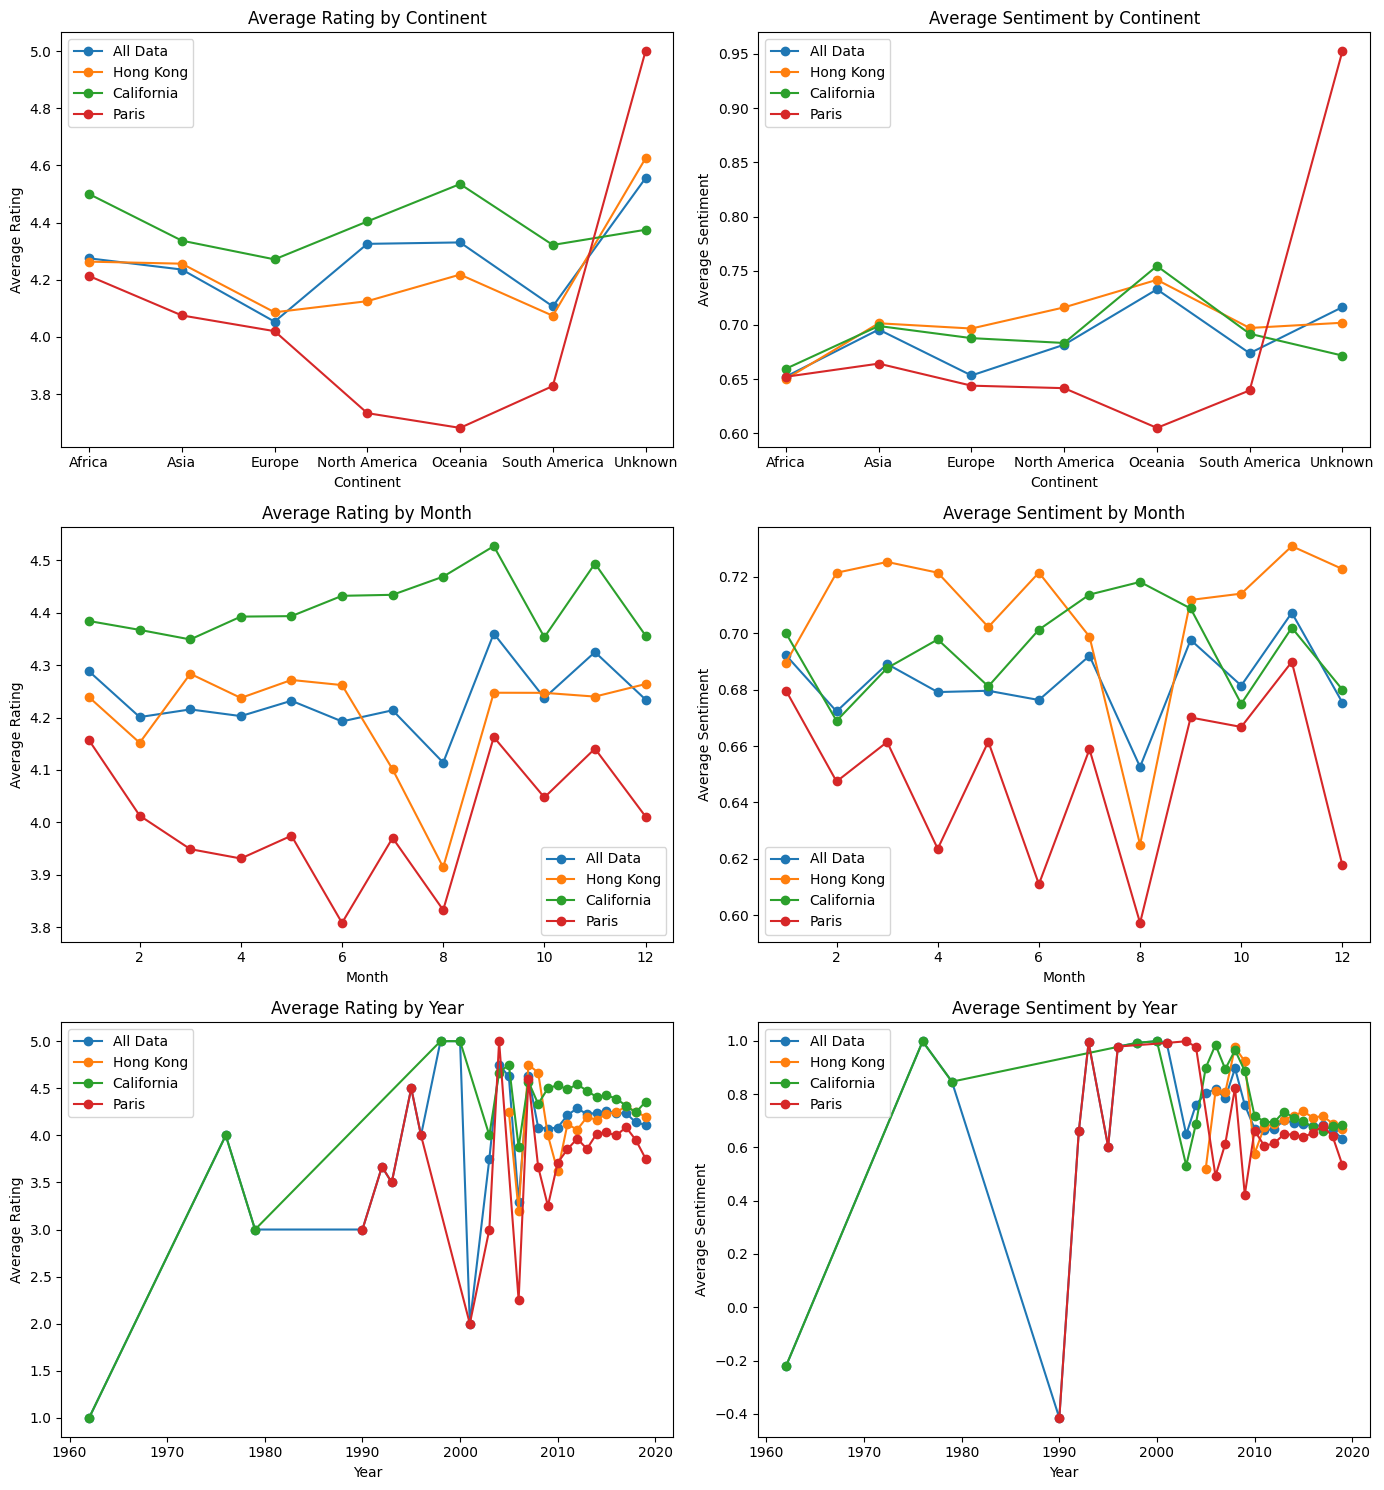

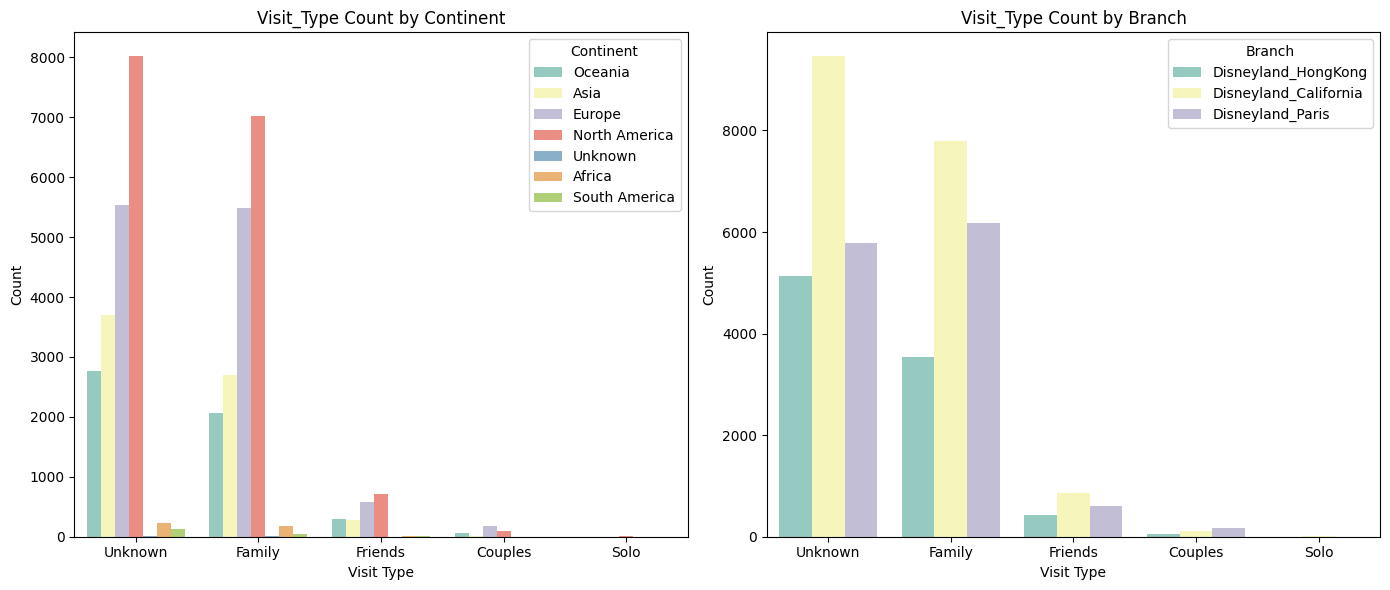

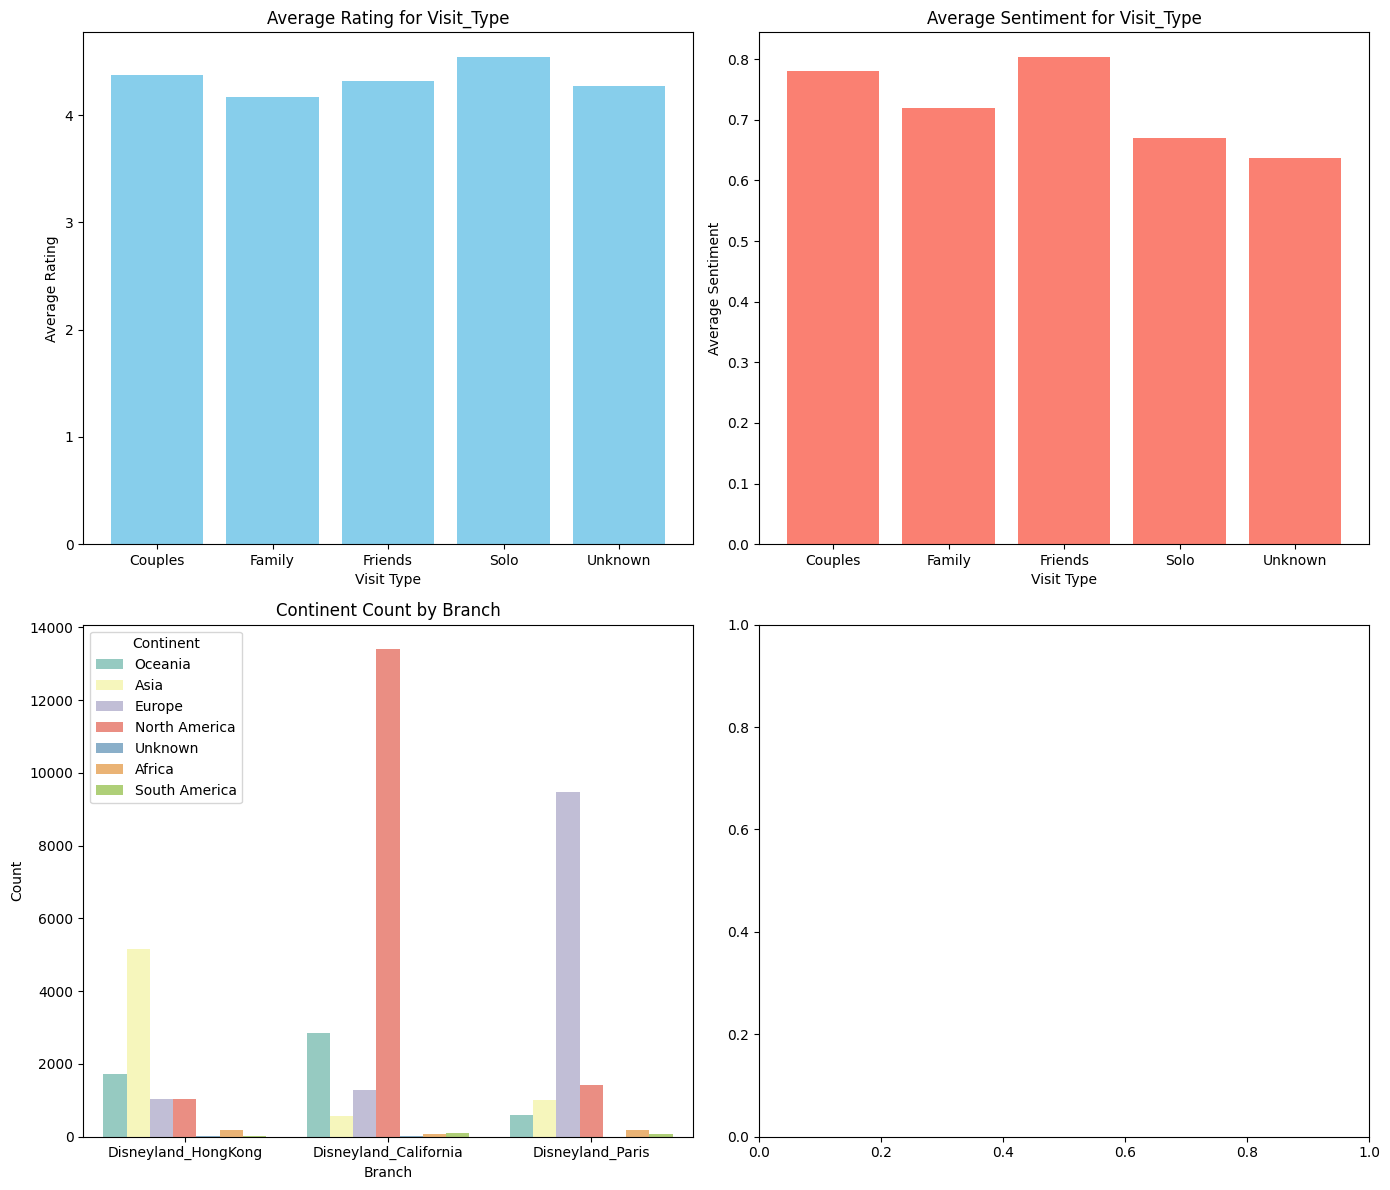

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axs = plt.subplots(3, 2, figsize=(14, 15))

datasets = {
    "All Data": df_all,
    "Hong Kong": df_hongkong,
    "California": df_california,
    "Paris": df_paris
}

# Left: Average Rating by Continent
for name, data in datasets.items():
    axs[0, 0].plot(data.groupby('Continent')['Rating'].mean(), marker='o', label=name)
axs[0, 0].set_title('Average Rating by Continent')
axs[0, 0].set_xlabel('Continent')
axs[0, 0].set_ylabel('Average Rating')
axs[0, 0].legend()

# Right: Average Sentiment by Continent
for name, data in datasets.items():
    axs[0, 1].plot(data.groupby('Continent')['Sentiment'].mean(), marker='o', label=name)
axs[0, 1].set_title('Average Sentiment by Continent')
axs[0, 1].set_xlabel('Continent')
axs[0, 1].set_ylabel('Average Sentiment')
axs[0, 1].legend()

# Left: Average Rating by Month
for name, data in datasets.items():
    axs[1, 0].plot(data.groupby('Month')['Rating'].mean(), marker='o', label=name)
axs[1, 0].set_title('Average Rating by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Average Rating')
axs[1, 0].legend()

# Right: Average Sentiment by Month
for name, data in datasets.items():
    axs[1, 1].plot(data.groupby('Month')['Sentiment'].mean(), marker='o', label=name)
axs[1, 1].set_title('Average Sentiment by Month')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Sentiment')
axs[1, 1].legend()


# Left: Average Rating by Year
for name, data in datasets.items():
    axs[2, 0].plot(data.groupby('Year')['Rating'].mean(), marker='o', label=name)
axs[2, 0].set_title('Average Rating by Year')
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Average Rating')
axs[2, 0].legend()

# Right: Average Sentiment by Year
for name, data in datasets.items():
    axs[2, 1].plot(data.groupby('Year')['Sentiment'].mean(), marker='o', label=name)
axs[2, 1].set_title('Average Sentiment by Year')
axs[2, 1].set_xlabel('Year')
axs[2, 1].set_ylabel('Average Sentiment')
axs[2, 1].legend()

plt.tight_layout()
plt.show()

fig2, axs2 = plt.subplots(1, 2, figsize=(14, 6))

# Count Visit_Type by Continent
sns.countplot(x='Visit_Type', hue='Continent', data=df_all, ax=axs2[0], palette="Set3")
axs2[0].set_title('Visit_Type Count by Continent')
axs2[0].set_xlabel('Visit Type')
axs2[0].set_ylabel('Count')

# Count Visit_Type by Branch
sns.countplot(x='Visit_Type', hue='Branch', data=df_all, ax=axs2[1], palette="Set3")
axs2[1].set_title('Visit_Type Count by Branch')
axs2[1].set_xlabel('Visit Type')
axs2[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

fig3, axs3 = plt.subplots(2, 2, figsize=(14, 12))

#Average Rating for Visit_Type
visit_rating = df_all.groupby('Visit_Type')['Rating'].mean()
axs3[0, 0].bar(visit_rating.index, visit_rating.values, color='skyblue')
axs3[0, 0].set_title('Average Rating for Visit_Type')
axs3[0, 0].set_xlabel('Visit Type')
axs3[0, 0].set_ylabel('Average Rating')

#Average Sentiment for Visit_Type
visit_sentiment = df_all.groupby('Visit_Type')['Sentiment'].mean()
axs3[0, 1].bar(visit_sentiment.index, visit_sentiment.values, color='salmon')
axs3[0, 1].set_title('Average Sentiment for Visit_Type')
axs3[0, 1].set_xlabel('Visit Type')
axs3[0, 1].set_ylabel('Average Sentiment')

#Continent Count by Branch
sns.countplot(x='Branch', hue='Continent', data=df_all, ax=axs3[1, 0], palette="Set3")
axs3[1, 0].set_title('Continent Count by Branch')
axs3[1, 0].set_xlabel('Branch')
axs3[1, 0].set_ylabel('Count')

plt.tight_layout()
plt.show()


DBSCAN

C:\Users\angsp\AppData\Local\Temp\ipykernel_4668\2320077402.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df_dbscan, palette="Set3")
C:\Users\angsp\AppData\Local\Temp\ipykernel_4668\2320077402.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df_dbscan, palette="Set3")


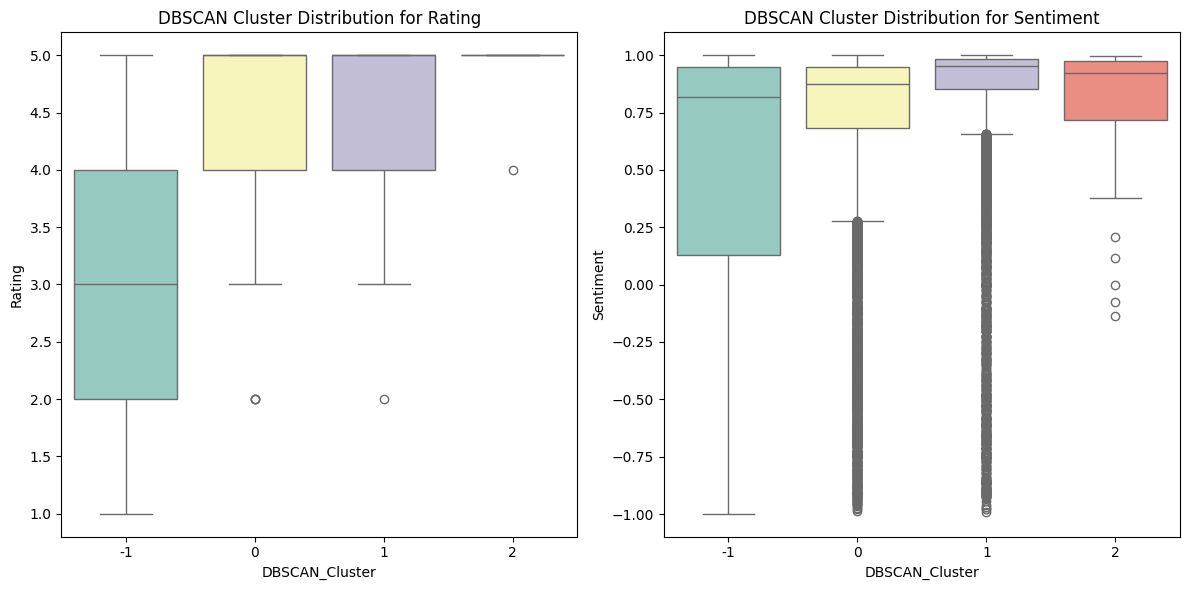

DBSCAN Cluster Descriptive Statistics:

                 Rating                                               \
                  count      mean       std  min  25%  50%  75%  max   
DBSCAN_Cluster                                                         
-1              12590.0  3.186577  1.195110  1.0  2.0  3.0  4.0  5.0   
 0              15394.0  4.707289  0.489681  2.0  4.0  5.0  5.0  5.0   
 1              12091.0  4.703085  0.491287  2.0  4.0  5.0  5.0  5.0   
 2                 92.0  4.989130  0.104257  4.0  5.0  5.0  5.0  5.0   

               Sentiment            ...                    Month            \
                   count      mean  ...     75%     max    count      mean   
DBSCAN_Cluster                      ...                                      
-1               12590.0  0.472873  ...  0.9488  0.9997  12590.0  6.559333   
 0               15394.0  0.727984  ...  0.9496  0.9991  15394.0  6.933416   
 1               12091.0  0.840216  ...  0.9838  0.9999  12091.0 

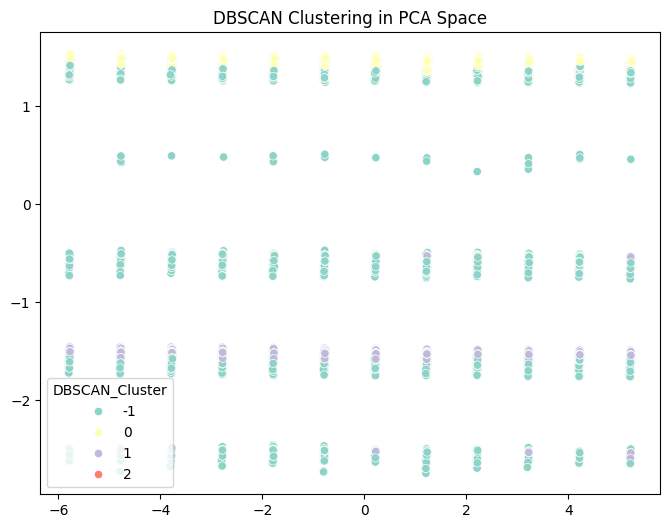

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


df_dbscan = df_all.copy()

df_dbscan['Visit_Type'] = df_dbscan['Visit_Type'].astype('category').cat.codes
df_dbscan['Continent'] = df_dbscan['Continent'].astype('category').cat.codes
features = ['Rating', 'Sentiment', 'Month', 'Visit_Type', 'Continent']

dbscan = DBSCAN(eps=1, min_samples=100)  
df_dbscan['DBSCAN_Cluster'] = dbscan.fit_predict(df_dbscan[features])


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='DBSCAN_Cluster', y='Rating', data=df_dbscan, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Rating')

plt.subplot(1, 2, 2)
sns.boxplot(x='DBSCAN_Cluster', y='Sentiment', data=df_dbscan, palette="Set3")
plt.title('DBSCAN Cluster Distribution for Sentiment')

plt.tight_layout()
plt.show()

# Check the DBSCAN cluster distribution
dbscan_stats = df_dbscan.groupby('DBSCAN_Cluster')[['Rating', 'Sentiment', 'Month']].describe()

# Show the DBSCAN stats for each cluster
print("DBSCAN Cluster Descriptive Statistics:\n")
print(dbscan_stats)

# Visualizing DBSCAN clusters in PCA space
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_dbscan[features])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_dbscan['DBSCAN_Cluster'], palette='Set3')
plt.title('DBSCAN Clustering in PCA Space')
plt.show()


Cluster -1 (Noise/Outliers)

These points do not fit into any cluster's density, but these reviews aren't necessarily good or bad, but rather unusual combinations of the features that did not meet any of the other density threshold. This group might contain visitors from less common months or continent, or with a combination of moderate rating and sentiment that places them outside the denser regions of the data. 

Cluster 0 (Moderate Satisfaction)
Demographics (Hypothetical)
Families, couples, or regular travelers who look for a reliable, comfortable experience.
Likely a diverse age range, but share a preference for consistent quality.

Behavioral Attributes
Rating: High average (4.71), fairly close to 5.
Sentiment: Positive (0.73), indicating mostly favorable comments.
Timing: Average month ~6.93, suggesting they favor summer visits (June/July).

Preference-Based Insights
Appreciate a well-rounded, reliable experience (good service, clean facilities).
May be open to slight up-sells if they see clear value.
Not as vocal or enthusiastic as Cluster 1, but still content and likely to return.

Actionable Insights
Maintain Quality: Focus on consistency in service, room quality, and dining experiences.
Upselling Opportunities: Offer add-ons (e.g., tours, spa packages) that enhance the experience without risking dissatisfaction.
Retention Programs: Introduce loyalty or membership perks to convert them into repeat customers.

Cluster 1 (High Satisfaction)
Demographics (Hypothetical)
Possibly more experienced travelers or those loyal to the brand.
Could be mid- to higher-income individuals who value excellent service and are willing to pay for it.

Behavioral Attributes
Rating: 4.70—nearly identical to Cluster 0, but with a slightly broader distribution.
Sentiment: 0.84, the highest among all clusters, indicating very positive written feedback.
Timing: Average month ~6.84 (also around June/July), similar to Cluster 0.

Preference-Based Insights
Value the intangible aspects of a stay (personalized service, brand recognition, loyalty benefits).
More likely to leave detailed, positive reviews or recommend to friends/family.

Actionable Insights
Referral & Ambassador Programs: Encourage them to share their positive experiences on social media or review platforms.
Personalization: Recognize repeat visits with personalized welcomes or exclusive perks.
Community Building: Invite them to loyalty clubs or events where they can connect with other loyal customers.

Cluster 2 (Extremely Satisfied)
Demographics (Hypothetical)
Could be VIPs, premium travelers, or a specialized segment (e.g., event attendees, honeymooners).
Possibly smaller groups or individuals traveling for a unique occasion.

Behavioral Attributes
Count: Only 92, making this the smallest cluster.
Rating: 4.99, nearly perfect. Standard deviation is extremely low (~0.10).
Sentiment: 0.80, also quite high (close to Cluster 1).
Timing: Average month ~1.01, indicating January visits—possibly tied to holiday or New Year’s events.

Preference-Based Insights
They consistently have an outstanding experience (almost always 5-star reviews).
Likely highly motivated by special occasions, unique offerings, or seasonal events.

Actionable Insights
Exclusive Experiences: Provide VIP treatment, early access, or premium event invitations.
Leverage Seasonality: If these are holiday guests, create special New Year’s packages or promotions to keep them returning.
High-Touch Service: Personalized communication, follow-up thank-you notes, or direct phone calls to build loyalty.

Overall Takeaways
Retain & Delight Cluster 0
Keep service consistent, offer moderate upsells, encourage loyalty sign-ups.

Empower Cluster 1
Tap into their enthusiasm with referral programs, personalized perks, and brand advocacy.

Celebrate Cluster 2
Provide ultra-personalized experiences, highlight seasonal or exclusive events, and maintain top-notch service for this niche group.

KMeans

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


df_km = df_all.copy()
df_km['Visit_Type_Code'] = df_km['Visit_Type'].astype('category').cat.codes
df_km['Continent_Code'] = df_km['Continent'].astype('category').cat.codes
features = ['Rating', 'Sentiment', 'Month', 'Visit_Type_Code', 'Continent_Code']
X = df_km[features]

inertia = []
sil_scores = []
k_range = range(2, 10) 

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    inertia.append(km.inertia_)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', color='blue')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Opitmal K Based on the plots
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_km['KMeans_Cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df_km['KMeans_Cluster'], palette='Set3')
plt.title(f'KMeans Clustering (k={optimal_k}) in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title="Cluster")
plt.show()

sns.pairplot(df_km, vars=features, hue='KMeans_Cluster', palette='Set3')
plt.suptitle('Pairplot of Features by KMeans Cluster', y=1.02)
plt.show()

cluster_profile = df_km.groupby('KMeans_Cluster')[['Rating', 'Sentiment', 'Month', 'Visit_Type_Code', 'Continent_Code']].describe()
print("KMeans Cluster Descriptive Statistics:\n")
print(cluster_profile)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\angsp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\angsp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1043, in launch

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

Cluster 0
Rating: ~4.25 (High)
Sentiment: ~0.64 (Moderate)
Month: ~5.56 (Late Spring/Early Summer: April–July range)

Interpretation:
These guests are generally satisfied (mean rating >4.0).
Text feedback is moderately positive but not as enthusiastic as some other clusters.
They tend to visit in late spring to early summer (April–July).

Actionable Insights:
Early-Summer Campaigns: Offer promotions or special packages for May–June travelers to reinforce their positive experience.
Nudge Higher Ratings: Since sentiment is a bit lower than expected for a 4.25 rating, consider small service improvements or better communication to convert “good” experiences into “great” ones.
Preemptive Support: Provide details about peak-season amenities, local events, or weather tips to manage expectations and reduce potential dissatisfaction.

Cluster 1
Rating: ~4.24 (High)
Sentiment: ~0.73 (High)
Month: ~10.55 (Fall to Early Winter: September–December range)

Interpretation:
Similar overall rating to Cluster 0, but sentiment is higher, indicating more positive or enthusiastic text reviews.
Visits concentrate in the fall/holiday season.

Actionable Insights:
Holiday & Festive Promotions: Leverage their higher sentiment around end-of-year festivities—e.g., Christmas, New Year’s, or autumn events.
Encourage Advocacy: Their strong sentiment suggests they’re more likely to share positive feedback on social media or review sites. Offer referral bonuses or loyalty points for reviews.
Seasonal Upsells: Focus on holiday-themed experiences (e.g., special dinners, holiday shows) that match their likely travel window.


Cluster 2
Rating: ~4.22 (Moderately High)
Sentiment: ~0.69 (Moderate-High)
Month: ~2.41 (Winter/Early Spring: January–April range)

Interpretation:
The largest cluster (9,875 guests), with decent ratings and sentiment.
Primarily traveling in winter or early spring.
Slightly lower average rating than Clusters 0 and 1, but still above 4.0.

Actionable Insights:
Winter Specials: Offer packages tailored for the January–March period (e.g., Valentine’s getaways, spring break deals).
Boost Engagement: If they have moderate sentiment, consider sending personalized follow-up surveys or loyalty offers to maintain goodwill.
Volume Advantage: As the biggest group, even small improvements in their experience can significantly impact overall ratings and revenue.

Cluster 3
Rating: ~4.29 (Second-highest)
Sentiment: ~0.64 (Similar to Cluster 0)
Month: ~9.95 (Late Summer to Fall: August–December)

Interpretation:
Very close to Cluster 0 in sentiment, but a slightly higher rating (4.29 vs. 4.25).
They visit in late summer through fall, peaking around September/October.
Somewhat paradoxical that sentiment is not higher despite a good rating, suggesting they might rate well but not elaborate positively in text.

Actionable Insights:
Bridge the Rating–Sentiment Gap: Investigate why text sentiment is moderate even though star ratings are high. Possibly these guests are concise or reserved in written feedback.
Focus on Seasonal Events: Many destinations have major events in August–November (e.g., fall festivals). Promote relevant experiences to maintain strong satisfaction.
Targeted Surveys or Interviews: To understand what they like most (they do rate you highly) and how to convert that into more enthusiastic word-of-mouth.

Cluster 4
Rating: ~4.14 (Lowest among the five, but still above 4.0)
Sentiment: ~0.72 (Fairly high text positivity)
Month: ~6.57 (Spring to Summer: April–August)

Interpretation:
A curious mix: lowest average rating yet relatively high sentiment (comparable to Cluster 1’s 0.73).
Visits occur in the late spring/summer window.
Possibly these guests are warm in their feedback but with specific complaints that lower their final rating.

Actionable Insights:
Investigate Rating Discrepancies: If they speak positively (sentiment ~0.72) but still give 4.14 on average, identify specific service gaps. Maybe a critical amenity or logistical issue.
Summer Experience Enhancements: Offer improved check-in processes, better air-conditioning, or summer activity bundles to address potential friction points.
Encourage Detailed Feedback: Their textual sentiment is positive; prompting them to share more detailed reviews might reveal easy fixes that could raise their ratings to match their sentiment.

Overall

Seasonal Patterns
Cluster 2 (largest) is a winter–early spring crowd, while Clusters 0 and 4 favor spring–summer, and Clusters 1 and 3 lean toward fall–winter.
Align promotions, events, and staffing levels with each cluster’s travel window.

Rating vs. Sentiment
Most clusters have 4.1–4.3 average ratings, but sentiment scores vary from ~0.64 to ~0.73.
Cluster 1 has a higher sentiment (0.73) but the same rating as 0 (~4.24–4.25).
Cluster 4 shows the lowest rating (4.14) yet fairly high sentiment (0.72), suggesting a mismatch worth investigating.

Actionable Insights
Cluster 0 & 3: Similar moderate sentiment (~0.64) but decent ratings. They might be short, matter-of-fact reviewers who rate well but don’t gush in text.
Cluster 1: Strong sentiment and good ratings, especially during the fall–winter season—ideal for holiday or end-of-year marketing.
Cluster 2: Largest group, with a winter/early-spring focus. Even small improvements can yield big gains in overall ratings and revenue.
Cluster 4: Needs attention to close the gap between positive text feedback and lower star ratings, especially during peak summer months.


Mismatch Statistics:
count    40167.000000
mean         0.820211
std          2.144628
min         -3.994500
25%         -0.275000
50%          0.253500
75%          1.145750
max          9.850500
Name: mismatch, dtype: float64

Segment Counts (Quantile-based):
mismatch_segment
Moderate Mismatch     10044
Low Mismatch          10043
Very High Mismatch    10042
High Mismatch         10038
Name: count, dtype: int64

KMeans Mismatch Clusters (mean and count):
                      mean  count
mismatch_cluster                 
0                 6.233578   3708
1                 0.378163  22101
2                -1.218769   9387
3                 2.597886   4971


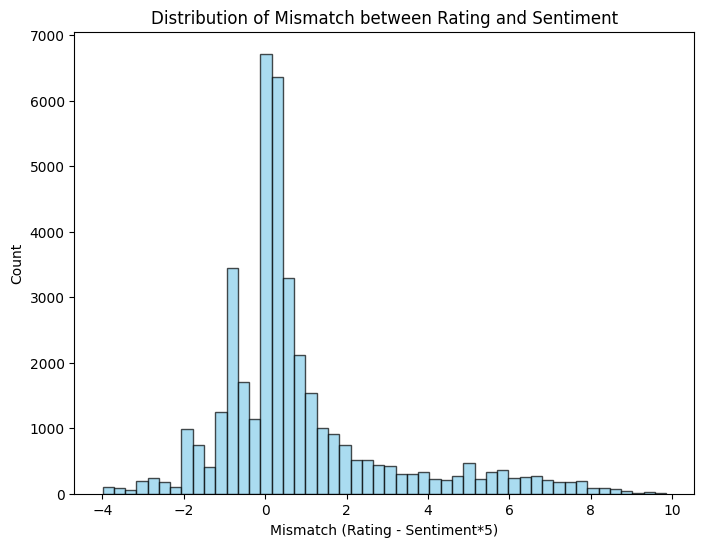

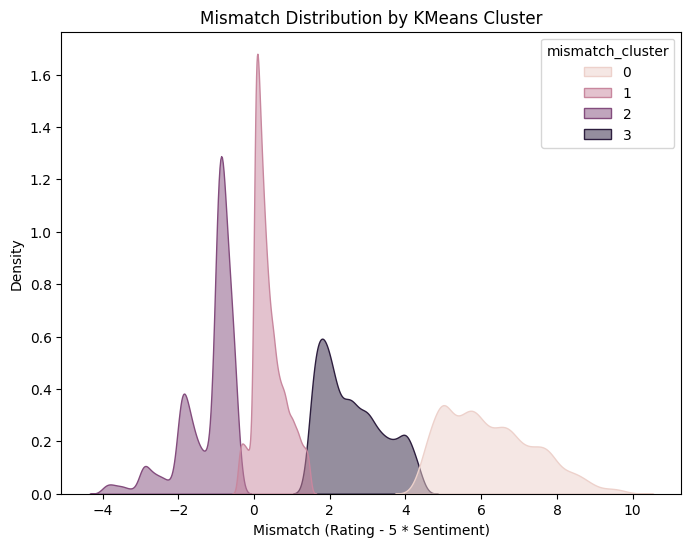

C:\Users\angsp\AppData\Local\Temp\ipykernel_4668\3058077204.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


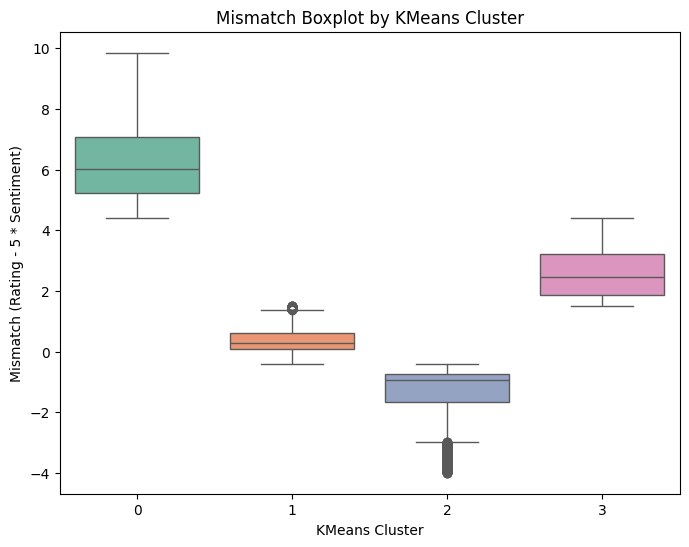

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df['mismatch'] = df['Rating'] - (df['Sentiment'] * 5)

# Display summary statistics of the mismatch
print("Mismatch Statistics:")
print(df['mismatch'].describe())

df['mismatch_segment'] = pd.qcut(df['mismatch'], q=4, labels=[
    'Low Mismatch', 'Moderate Mismatch', 'High Mismatch', 'Very High Mismatch'
])

print("\nSegment Counts (Quantile-based):")
print(df['mismatch_segment'].value_counts())

X = df[['mismatch']].values
kmeans = KMeans(n_clusters=4, random_state=42)
df['mismatch_cluster'] = kmeans.fit_predict(X)

print("\nKMeans Mismatch Clusters (mean and count):")
print(df.groupby('mismatch_cluster')['mismatch'].agg(['mean', 'count']))

plt.figure(figsize=(8,6))
plt.hist(df['mismatch'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Mismatch (Rating - Sentiment*5)')
plt.ylabel('Count')
plt.title('Distribution of Mismatch between Rating and Sentiment')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df,
    x='mismatch',
    hue='mismatch_cluster', 
    fill=True,
    common_norm=False,      
    alpha=0.5
)
plt.title("Mismatch Distribution by KMeans Cluster")
plt.xlabel("Mismatch (Rating - 5 * Sentiment)")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='mismatch_cluster',  
    y='mismatch',
    data=df,
    palette='Set2'
)

plt.title("Mismatch Boxplot by KMeans Cluster")
plt.xlabel("KMeans Cluster")
plt.ylabel("Mismatch (Rating - 5 * Sentiment)")
plt.show()

Cluster 0: Extreme Over-Raters

Mean mismatch ~6.23, which is quite high.
These guests often give 4–5 star ratings even though their sentiment is more moderate or low.
Possible Reasons: They might be polite or feel obligated to leave a high rating, or they may quickly click 5 stars but express concerns in the text.
Business Takeaway: Look at their negative or lukewarm comments despite the high rating to identify hidden issues or unmet expectations.

Cluster 1: Mostly Aligned
Largest group (~22k guests), with a mean mismatch ~0.38.
Their star ratings and sentiment are fairly consistent—slightly over the text sentiment, but not by much.
Possible Reasons: They likely rate and comment with similar feelings. Minor rounding-up of the star rating could happen (e.g., 4.5 in mind, but they click 5).
Business Takeaway: This group is straightforward; what they say in text largely matches how they rate. Focus on maintaining their positive experience.

Cluster 2: Under-Raters
Mean mismatch ~–1.22 (negative).
These guests express fairly positive sentiment in text but give a lower star rating.
Possible Reasons: Perhaps a single negative aspect overshadowed an otherwise good experience, or they are harsher in numeric ratings.
Business Takeaway: They sound satisfied in reviews, but the numeric rating doesn’t reflect that. Investigate consistent pain points (e.g., price vs. value) that prompt them to rate lower than their words suggest.

Cluster 3: Moderate Over-Raters
Mean mismatch ~2.60, which is over-rating but not as extreme as Cluster 0.
They’re giving star ratings that exceed the tone of their text feedback, but less dramatically than Cluster 0.
Possible Reasons: They may be mostly happy but mention smaller issues in text. They still give a 4 or 5 star rating overall.
Business Takeaway: Compare their textual feedback to their final ratings to see what improvements could turn them into fully satisfied, consistently positive reviewers.

Possible Next Steps

Targeted Follow-Up for Extreme Over-Raters (Cluster 0)
Don’t be misled by the high star rating. Their text indicates they’re not as happy as the rating suggests.
Consider sending surveys or personal follow-ups to pinpoint their concerns.

Maintain Satisfaction for Mostly Aligned Guests (Cluster 1)
These are the “straight shooters.” Their feedback is a reliable indicator of their overall satisfaction.
Keep doing what’s working, and address any small suggestions for improvement.

Win Over the Under-Raters (Cluster 2)
These guests are the opposite of Cluster 0: they like your service (positive text), but the final rating is still under 5.
Quick wins might involve addressing minor annoyances, better price-value alignment, or clarifying amenities.

Nudge Moderate Over-Raters (Cluster 3)
They generally give good ratings but mention specific issues.
Fixing those recurring issues can turn them into truly happy advocates whose text sentiment matches (or exceeds) their numeric rating.

Split by Continent, then cluster

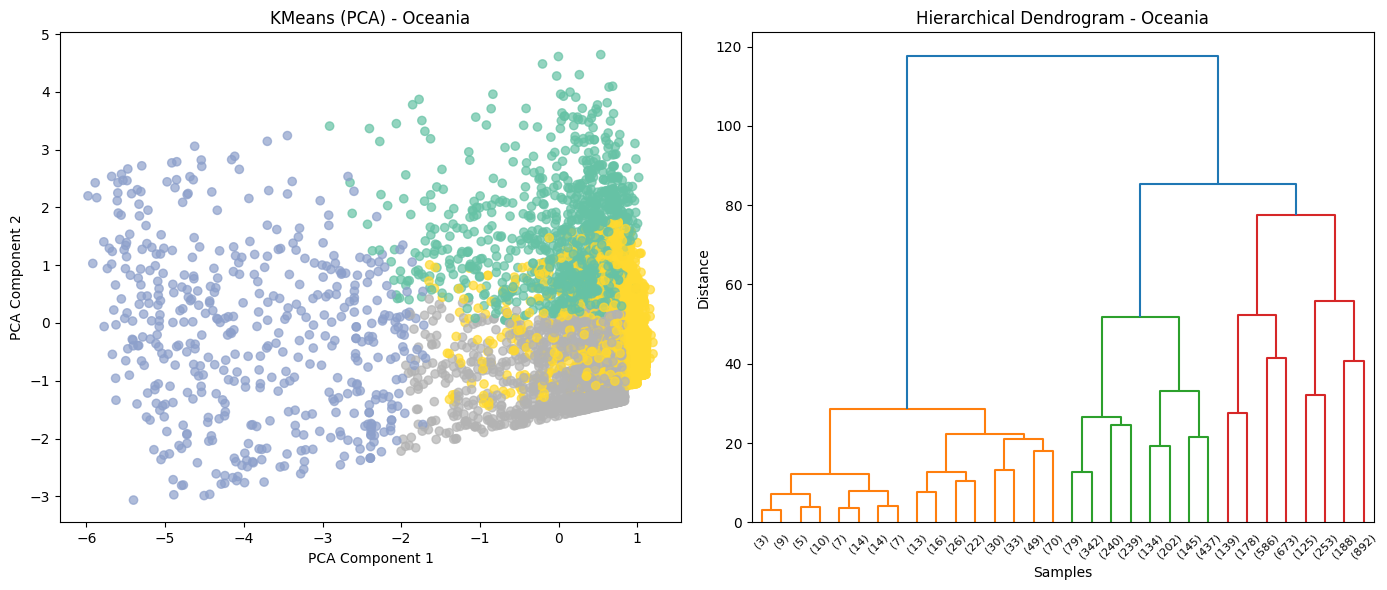

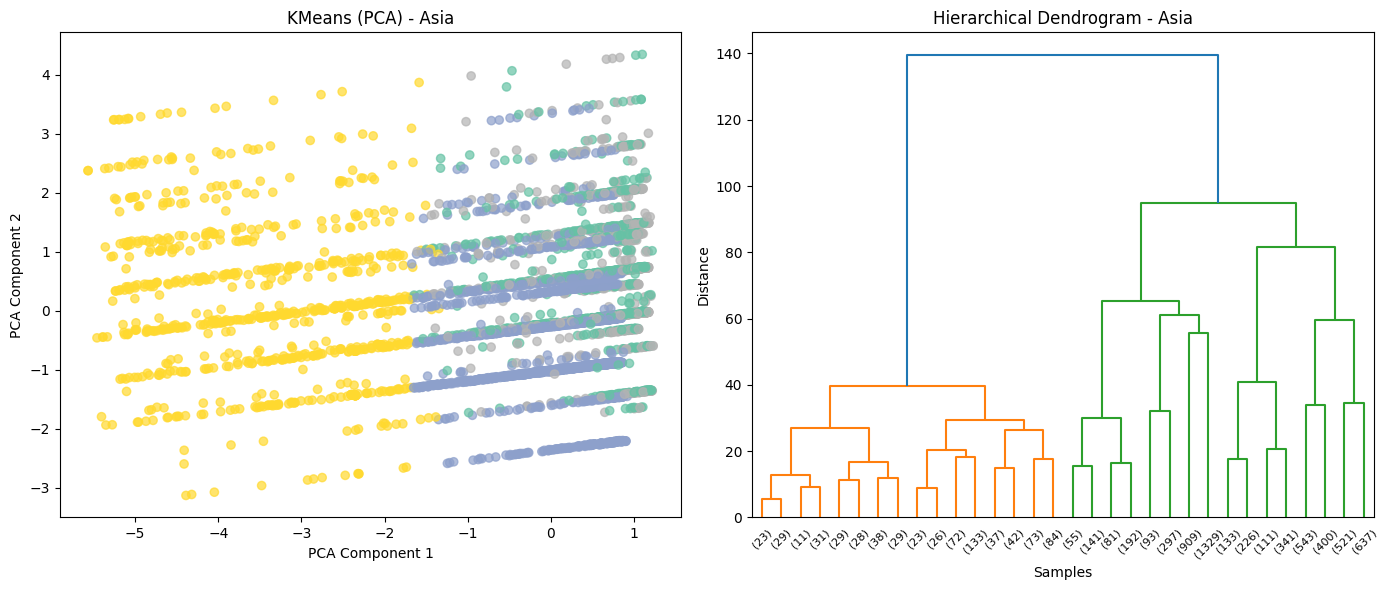

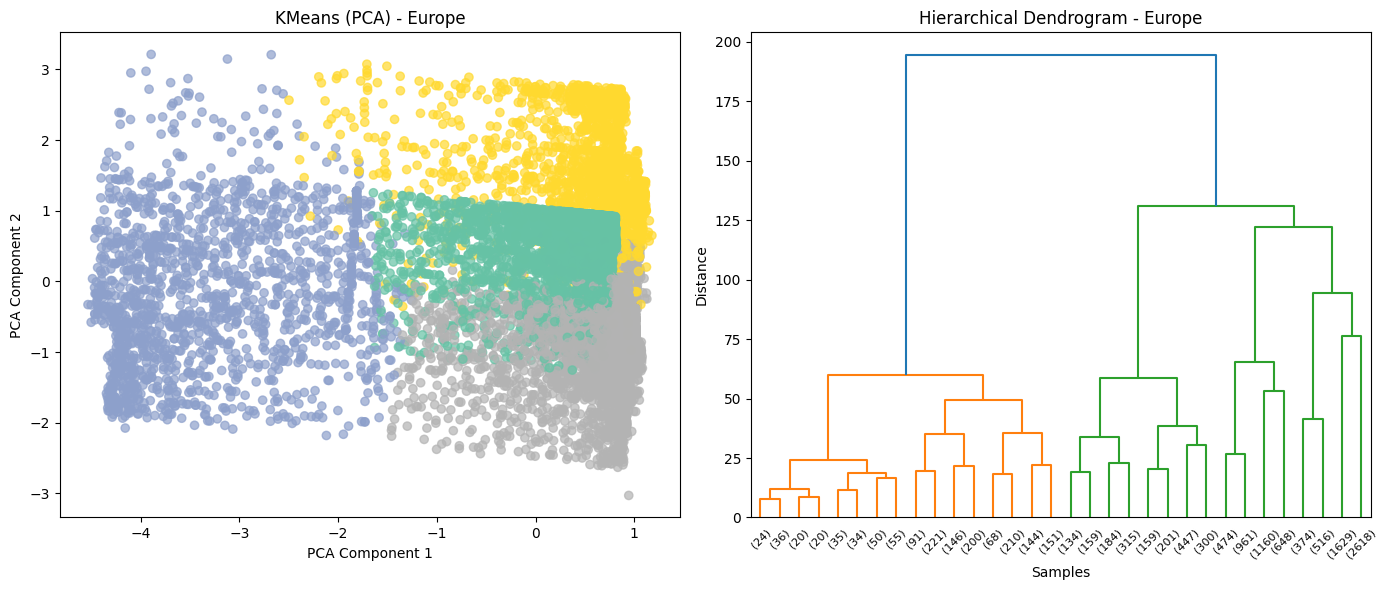

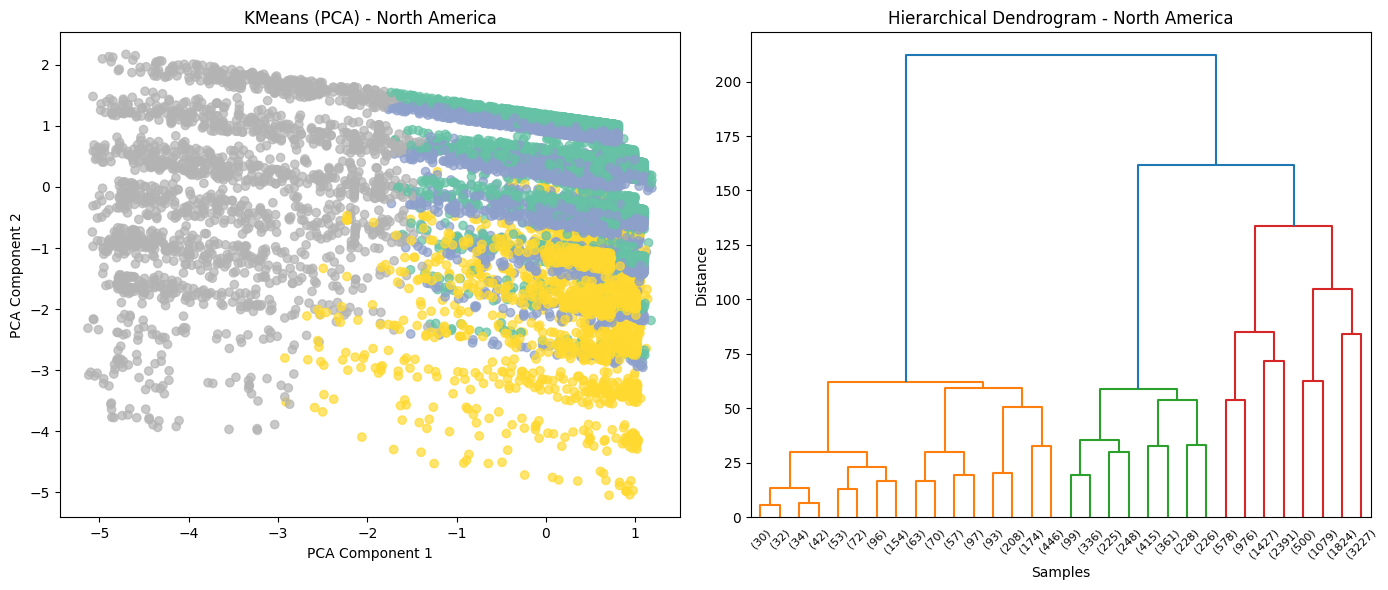

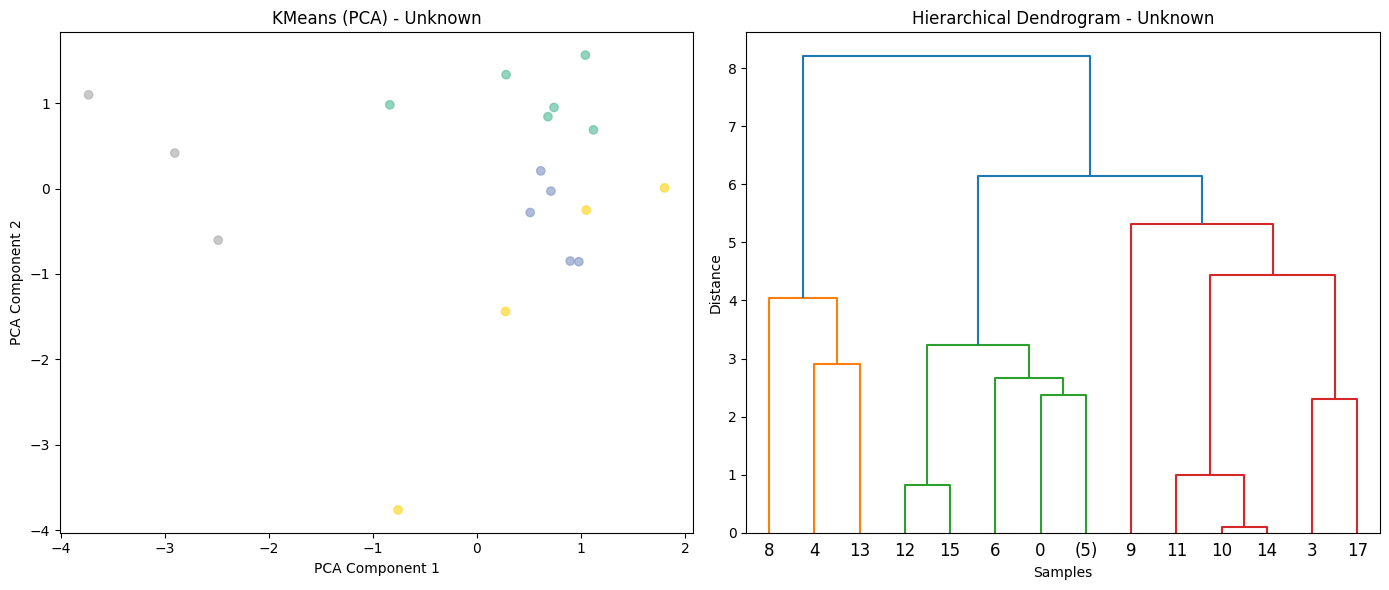

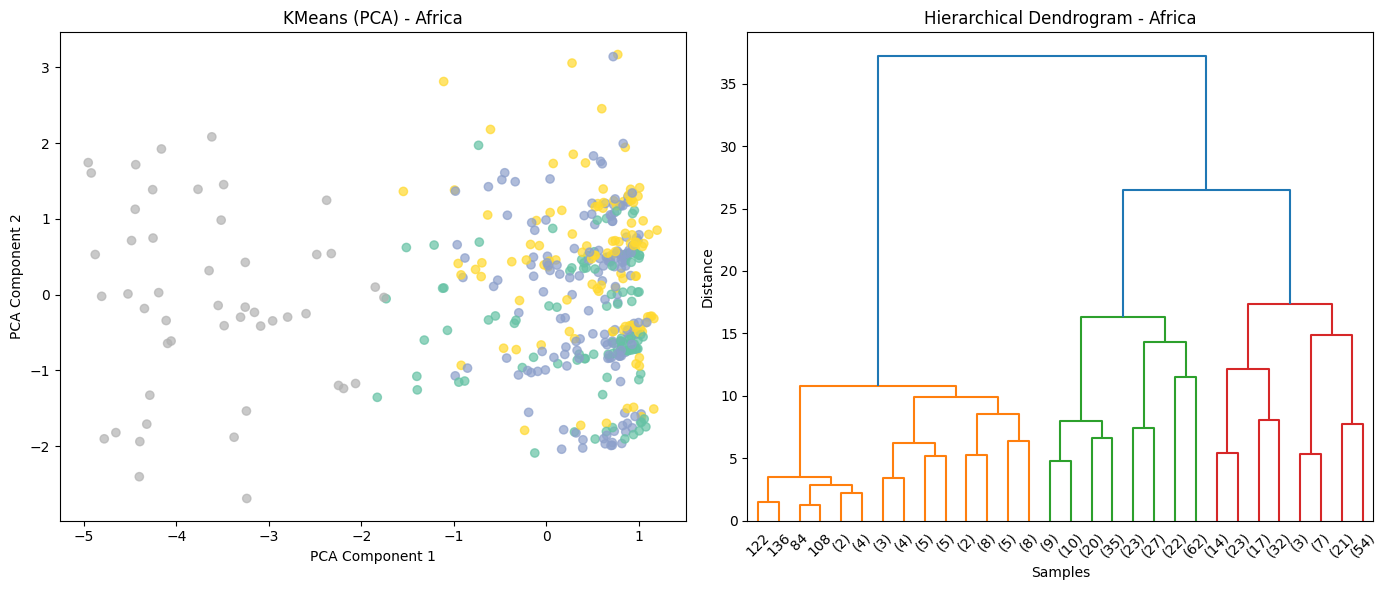

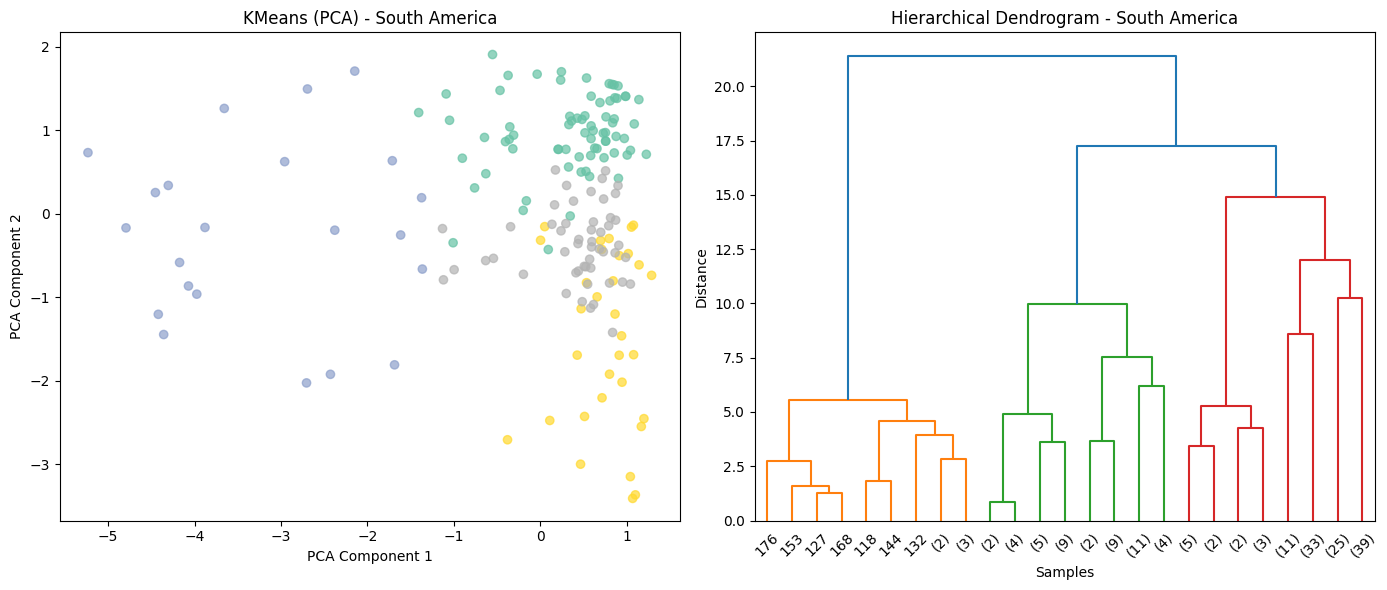

In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


df["Mismatch"] = df["Rating"] - (df["Sentiment"] * 5)
df["Visit_Type_code"] = df["Visit_Type"].astype('category').cat.codes
df["Branch_code"] = df["Branch"].astype('category').cat.codes

features = ["Rating", "Sentiment", "Month", "Mismatch", "Visit_Type_code", "Branch_code"]


continents = df["Continent"].unique()

for cont in continents:
 
    df_subset = df[df["Continent"] == cont].copy()

    df_subset = df_subset.dropna(subset=features)
    if df_subset.empty:
        continue
    
    X = df_subset[features].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # KMeans Clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    
    # Hierarchical Clustering
    linked = linkage(X_scaled, method='ward')
    
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    
    # Plot side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Left: PCA scatter colored by KMeans cluster
    scatter = axes[0].scatter(
        X_pca[:, 0], 
        X_pca[:, 1], 
        c=kmeans_labels, 
        cmap="Set2", 
        alpha=0.7
    )
    axes[0].set_title(f"KMeans (PCA) - {cont}")
    axes[0].set_xlabel("PCA Component 1")
    axes[0].set_ylabel("PCA Component 2")
    
    # Right: Hierarchical dendrogram
    dendrogram(linked, truncate_mode='level', p=4, ax=axes[1])
    axes[1].set_title(f"Hierarchical Dendrogram - {cont}")
    axes[1].set_xlabel("Samples")
    axes[1].set_ylabel("Distance")
    
    plt.tight_layout()
    plt.show()


Based on the clustering analysis using features such as Rating, Sentiment, Month, and Mismatch (along with demographic proxies like Visit_Type and Branch), several key insights emerged:

North America: Clusters show high overall ratings, yet certain segments exhibit rating-sentiment mismatches, suggesting that while guests generally rate highly, underlying issues may be masked.

Asia: Distinct seasonal variations are evident, with some segments over-rating during peak periods despite moderate sentiment. This indicates cultural or seasonal factors influencing the experience.

Europe: Clusters are more balanced, with closer alignment between ratings and sentiment, reflecting consistently positive guest experiences.

Oceania: Though data volume is lower, guest profiles appear stable and balanced across clusters.

Africa & South America: These regions display heterogeneous clusters, suggesting varied guest experiences that warrant deeper local investigation.

Actionable Recommendations:

Conduct targeted follow-up surveys in regions with significant mismatches (e.g., North America and Asia) to uncover and address hidden pain points.

Leverage season-specific promotions and service enhancements in Asia and North America.

Sustain high-quality experiences in Europe and Oceania through loyalty initiatives.

Perform localized studies in Africa and South America to tailor interventions.

Split by Visit_Type, then cluster

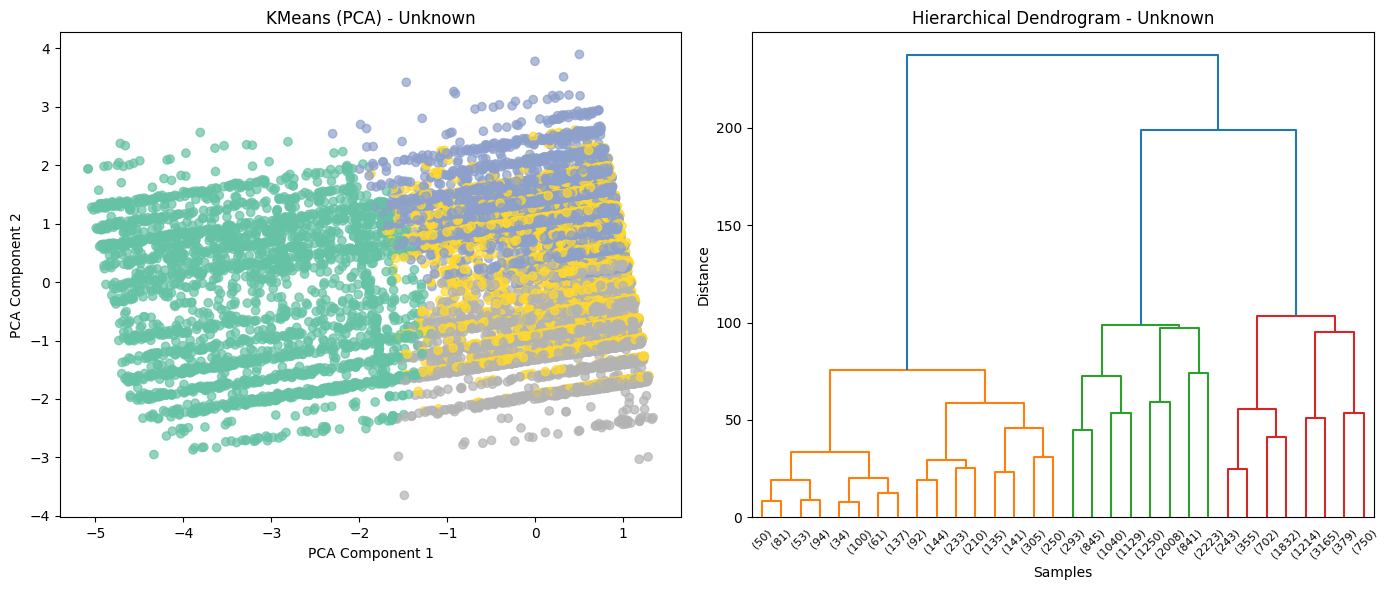

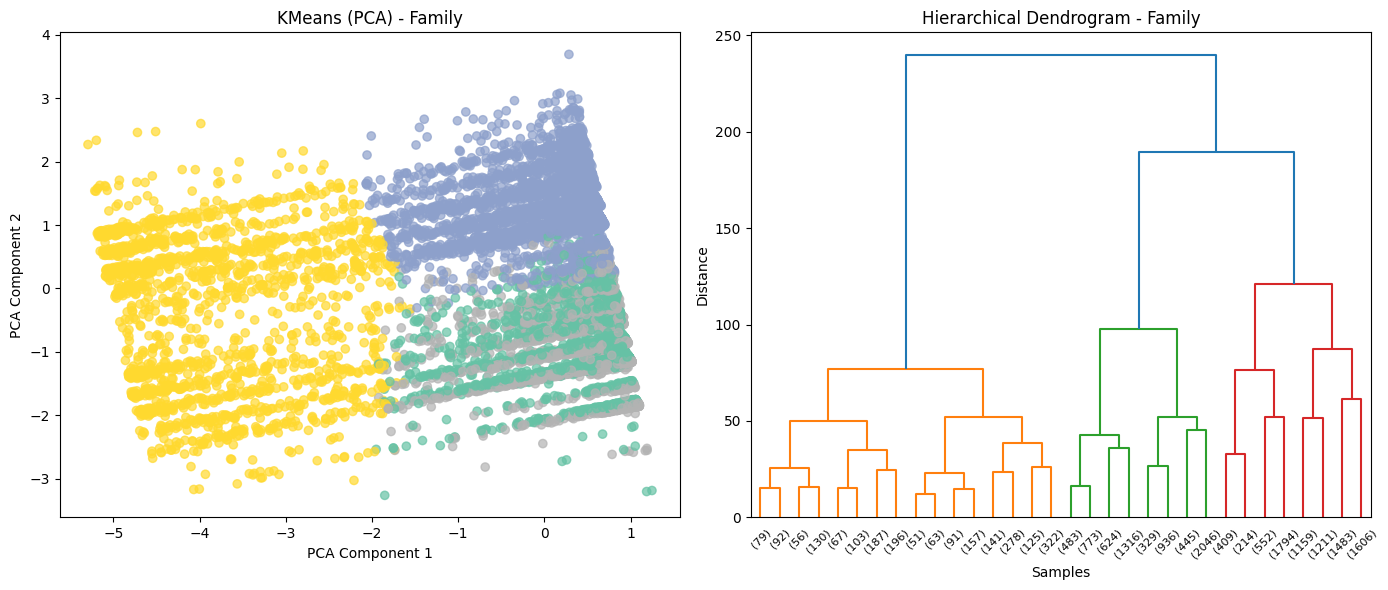

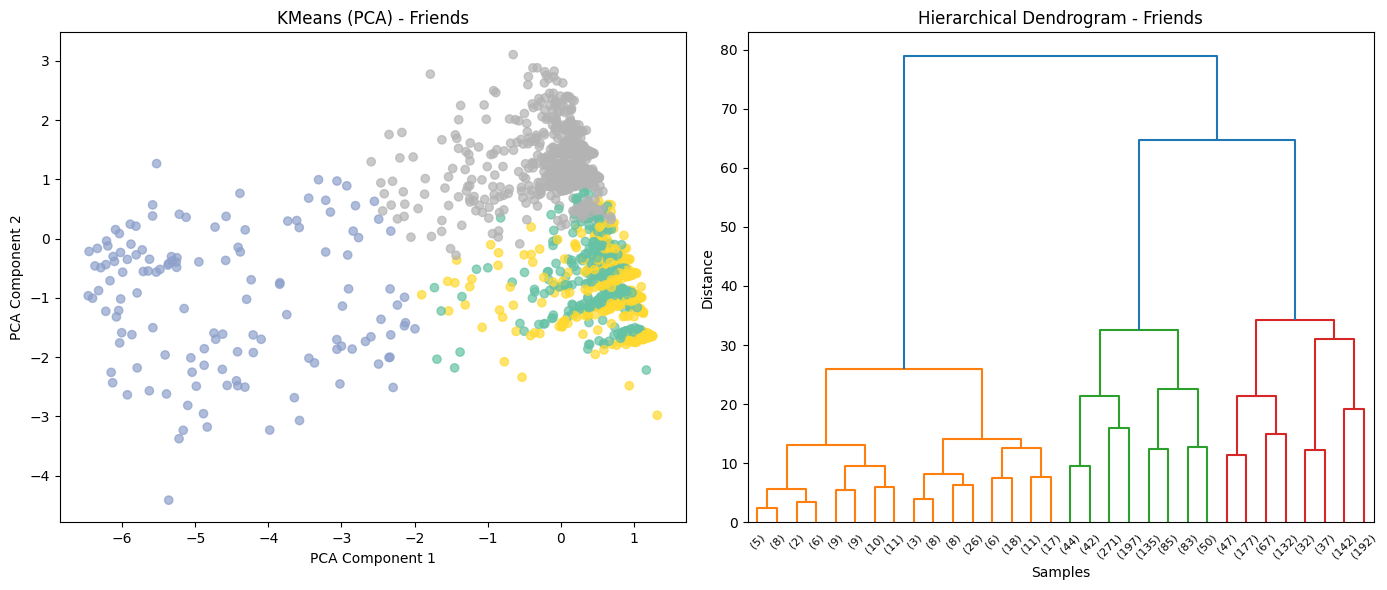

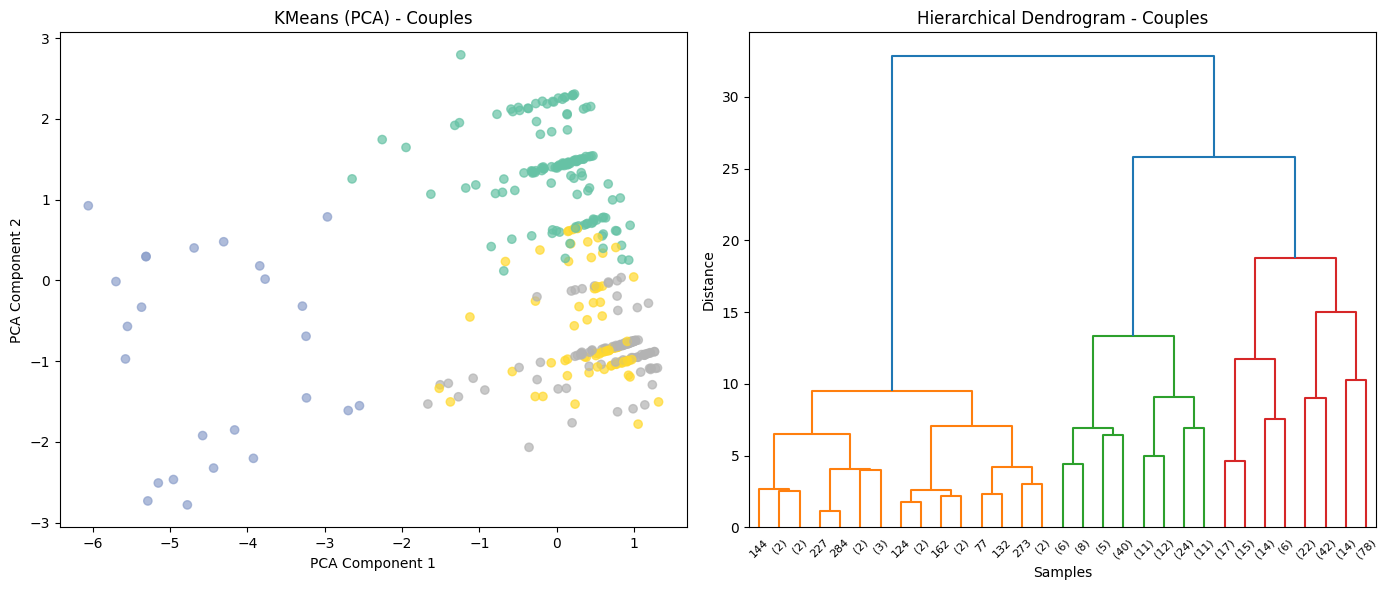

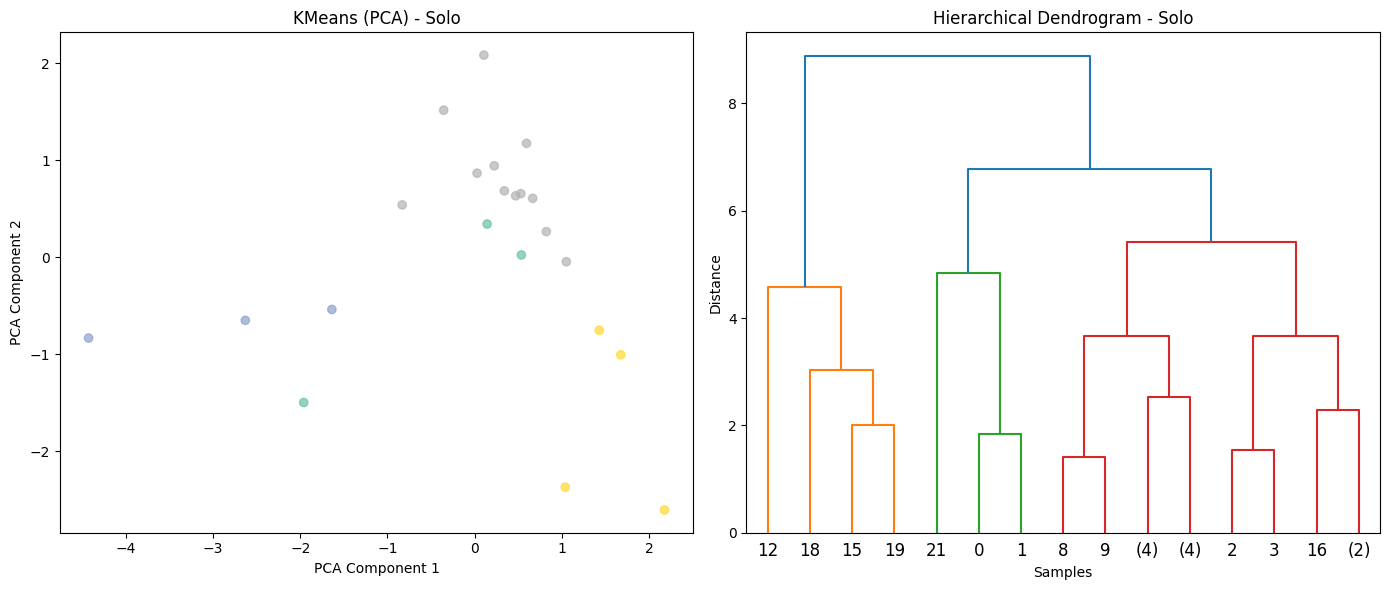

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df["Mismatch"] = df["Rating"] - (df["Sentiment"] * 5)
df["Branch_code"] = df["Branch"].astype('category').cat.codes
df["Continent_code"] = df["Continent"].astype('category').cat.codes

features = ["Rating", "Sentiment", "Month", "Mismatch", "Continent_code", "Branch_code"]

visit_types = df["Visit_Type"].unique()

for vt in visit_types:

    df_subset = df[df["Visit_Type"] == vt].copy()

    df_subset = df_subset.dropna(subset=features)
    if df_subset.empty:
        continue

    X = df_subset[features].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # KMeans Clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # Hierarchical Clustering
    linked = linkage(X_scaled, method='ward')

    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    # Plot side by side: left - KMeans (PCA), right - dendrogram
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Left: PCA scatter colored by KMeans cluster
    scatter = axes[0].scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        c=kmeans_labels,
        cmap="Set2",
        alpha=0.7
    )
    axes[0].set_title(f"KMeans (PCA) - {vt}")
    axes[0].set_xlabel("PCA Component 1")
    axes[0].set_ylabel("PCA Component 2")

    # Right: Hierarchical dendrogram
    dendrogram(linked, truncate_mode='level', p=4, ax=axes[1])
    axes[1].set_title(f"Hierarchical Dendrogram - {vt}")
    axes[1].set_xlabel("Samples")
    axes[1].set_ylabel("Distance")

    plt.tight_layout()
    plt.show()

Key Insights

Unknown: Large, diverse group with broad distributions in both PCA and dendrogram, suggesting mixed traveler profiles. Clusters may reflect varying regional or branch preferences, implying a need for more targeted data collection to better understand motivations.

Family: Dense clustering indicates consistent patterns—likely higher ratings and sentiment, plus moderate mismatch. Families appear more homogeneous, focusing on reliable, kid-friendly experiences.

Friends: Wider spread in PCA space suggests diverse priorities. Some clusters show strong ratings but moderate sentiment, hinting at hidden dissatisfaction or unmet group expectations (e.g., queue times, group deals).

Couples: Fewer data points yield tighter clusters, suggesting specialized needs (romantic experiences, privacy, or upgraded amenities). Ratings may be high, but mismatch spikes if expectations aren’t met.

Solo: Smallest dataset with scattered clusters. Likely niche travelers who might value flexibility, solitude, or unique offerings. Even minor improvements (e.g., single-rider lines, solo-friendly dining) could boost loyalty.

Actionable Recommendations

Unknown: Encourage more specific visit-type identification (e.g., surveys, booking forms) to tailor marketing and understand preferences.

Family: Maintain kid-friendly features and consistent service; highlight new family-focused attractions to enhance loyalty.

Friends: Offer group discounts, flexible packages, and social experiences (e.g., photo spots, meet-and-greets) to address hidden pain points.

Couples: Develop romantic packages, premium add-ons, or exclusive dining to meet higher expectations.

Solo: Provide single-rider lines, personal itineraries, and unique experiences to differentiate the park for independent travelers.

Overall Comment

Each visit type displays distinct clustering patterns across features (Rating, Sentiment, Month, Mismatch, Continent, Branch). Families show consistency, while couples and solo travelers are smaller but have more specialized demands. Friends exhibit a broad range of preferences, and the large “Unknown” group suggests an opportunity for better segmentation and targeted offerings.